<a href="https://colab.research.google.com/github/mskhan1103/CNN/blob/main/EfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install tensorflow keras kaggle --quiet

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import  EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [7]:
# Place your kaggle.json in /root/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Cats vs Dogs dataset
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip -d /content/dataset


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cat-and-dog.zip
replace /content/dataset/test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
train_dir = '/content/dataset/training_set/training_set'
val_dir = '/content/dataset/test_set/test_set'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [9]:
# Load VGG16 without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=predictions)


In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 155s 508ms/step - accuracy: 0.5004 - loss: 0.8655 - val_accuracy: 0.4995 - val_loss: 0.6932
Epoch 2/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.5000 - loss: 0.6926

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5000 - loss: 0.6926 - val_accuracy: 0.5010 - val_loss: 0.6932
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 103s 413ms/step - accuracy: 0.4934 - loss: 0.6933 - val_accuracy: 0.5005 - val_loss: 0.6931
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5005 - val_loss: 0.6931
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 419ms/step - accuracy: 0.5001 - loss: 0.6933 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5938 - loss: 0.6931 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 104s 416ms/step - accuracy: 0.4994 - loss: 0.6933 - val_accuracy: 0.4995 - val_loss: 0.6931
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5625 - loss: 0.6931 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 418ms/step - accuracy: 0.4965 - loss: 0.6932 - val_acc

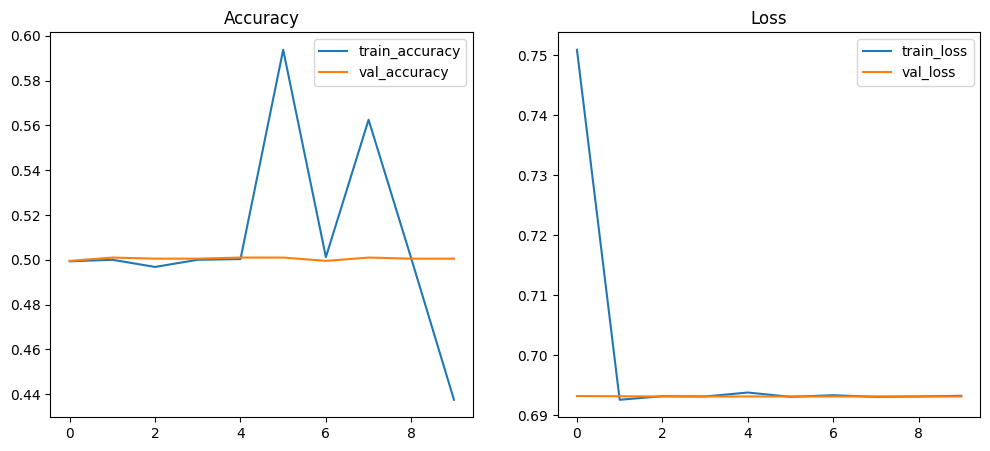

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()
